In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
df=pd.read_csv('student-performance.csv')

In [39]:
df.head()

,mm,Nationality,Educational Stages,Grade Levels,Section ID,Topic,Semester,Parent responsible for student,Raised hand,Visited resources,Viewing announcements,Discussion groups,Parent Answering Survey,ParentschoolSatisfaction,StudentAbsenceDays,Total Marks
0,Male,India,HighSchool,G-12,A,IT,First,Father,15,16,2,20,Yes,Good,Under-7,75
1,Male,India,HighSchool,G-12,A,IT,First,Father,20,20,3,25,Yes,Good,Under-7,82
2,Male,India,HighSchool,G-12,A,IT,First,Father,10,7,0,30,No,Bad,Above-7,60
3,Male,India,HighSchool,G-12,A,IT,First,Father,30,25,5,35,No,Bad,Above-7,67
4,Male,India,HighSchool,G-12,A,IT,First,Father,40,50,12,50,No,Bad,Above-7,85


In [4]:
df['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

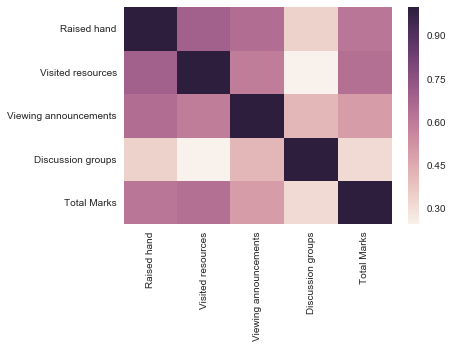

In [6]:
sns.heatmap(df.corr())

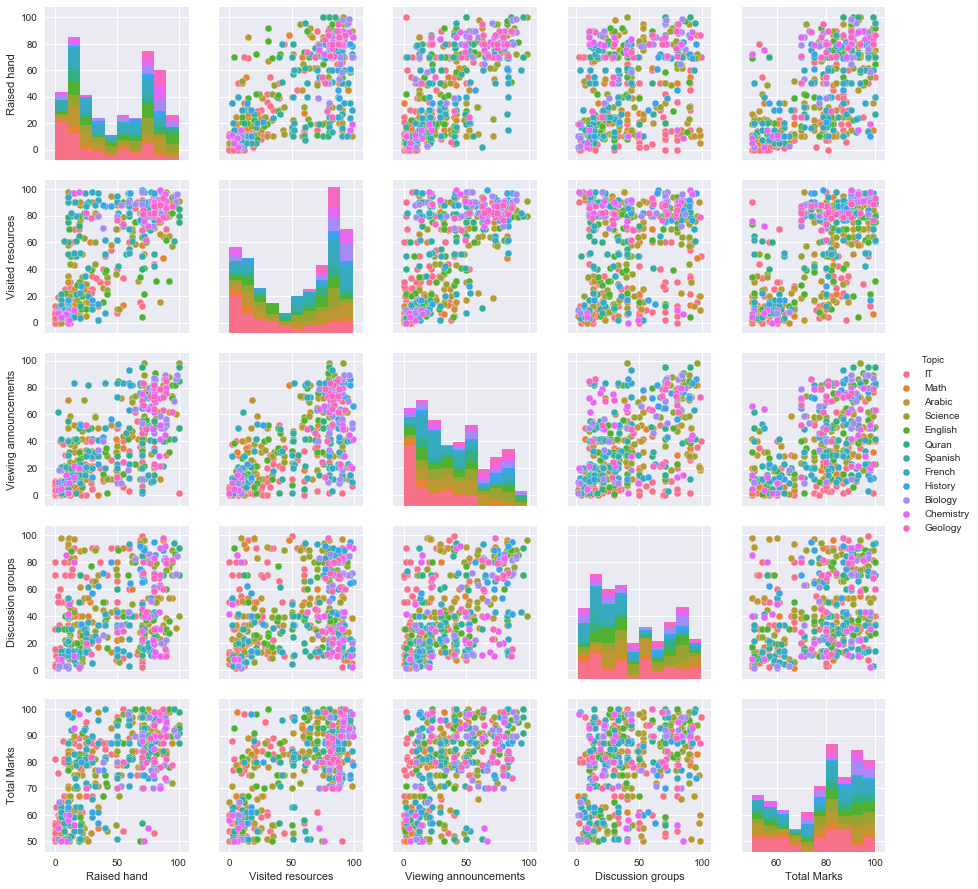

In [8]:
sns.pairplot(df,hue='Topic')

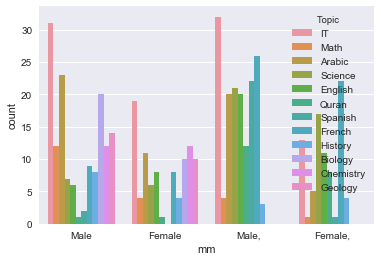

In [13]:
sns.countplot(x='mm',hue='Topic',data=df)

In [16]:
df['mm'].value_counts()

Male,      160
Male       145
Female      93
Female,     82
Name: mm, dtype: int64

In [96]:
df=df.rename(columns={'mm':'Gender'})

In [97]:
df.loc[df['Gender'].str.contains('Female'),'Gender'] = 'F'
df.loc[df['Gender'].str.contains('Male'),'Gender'] = 'M'

In [98]:
Gender=pd.get_dummies(df['Gender'],drop_first=True)

In [99]:
df=pd.concat([df,Gender],axis=1)

In [100]:
df=df.drop(['Gender'],axis=1)

In [101]:
df=df.rename(columns={'M':'Gender'})

In [102]:
df.head()

,Nationality,Educational Stages,Grade Levels,Section ID,Topic,Semester,Parent responsible for student,Raised hand,Visited resources,Viewing announcements,Discussion groups,Parent Answering Survey,ParentschoolSatisfaction,StudentAbsenceDays,Total Marks,Gender
0,India,HighSchool,G-12,A,IT,First,Father,15,16,2,20,Yes,Good,Under-7,75,1
1,India,HighSchool,G-12,A,IT,First,Father,20,20,3,25,Yes,Good,Under-7,82,1
2,India,HighSchool,G-12,A,IT,First,Father,10,7,0,30,No,Bad,Above-7,60,1
3,India,HighSchool,G-12,A,IT,First,Father,30,25,5,35,No,Bad,Above-7,67,1
4,India,HighSchool,G-12,A,IT,First,Father,40,50,12,50,No,Bad,Above-7,85,1


In [103]:
print(df['Educational Stages '].value_counts())
print(df['Nationality'].value_counts())
print(df['Grade Levels'].value_counts())
print(df['Semester'].value_counts())

HighSchool    480
Name: Educational Stages , dtype: int64
India    480
Name: Nationality, dtype: int64
G-12    480
Name: Grade Levels, dtype: int64
First     244
Second    235
F           1
Name: Semester, dtype: int64


In [104]:
df.loc[df['Semester'].str.contains('Second'),'Semester'] = 'S'
df.loc[df['Semester'].str.contains('F'),'Semester'] = 'F'

In [105]:
df.head(3)

,Nationality,Educational Stages,Grade Levels,Section ID,Topic,Semester,Parent responsible for student,Raised hand,Visited resources,Viewing announcements,Discussion groups,Parent Answering Survey,ParentschoolSatisfaction,StudentAbsenceDays,Total Marks,Gender
0,India,HighSchool,G-12,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,75,1
1,India,HighSchool,G-12,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,82,1
2,India,HighSchool,G-12,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,60,1


In [106]:
df=df.drop(['Educational Stages ','Nationality','Grade Levels'],axis=1)

In [76]:
df['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

In [78]:
df['Parent Answering Survey'].value_counts()

Yes    270
No     210
Name: Parent Answering Survey, dtype: int64

In [79]:
df['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [80]:
df['Parent responsible for student'].value_counts()

Father    283
mom       197
Name: Parent responsible for student, dtype: int64

In [107]:
df['StudentAbsenceDays']=df['StudentAbsenceDays'].astype('category')
df['StudentAbsenceDays']=df['StudentAbsenceDays'].cat.codes
df['Parent Answering Survey']=df['Parent Answering Survey'].astype('category')
df['Parent Answering Survey']=df['Parent Answering Survey'].cat.codes
df['ParentschoolSatisfaction']=df['ParentschoolSatisfaction'].astype('category')
df['ParentschoolSatisfaction']=df['ParentschoolSatisfaction'].cat.codes
df['Parent responsible for student']=df['Parent responsible for student'].astype('category')
df['Parent responsible for student']=df['Parent responsible for student'].cat.codes
df['Topic']=df['Topic'].astype('category')
df['Topic']=df['Topic'].cat.codes
df['Section ID']=df['Section ID'].astype('category')
df['Section ID']=df['Section ID'].cat.codes
df['Semester']=df['Semester'].astype('category')
df['Semester']=df['Semester'].cat.codes



In [115]:
def find_class(cols):
    marks=cols[0]
    if marks<70:
        return 0
    if marks<90:
        return 1
    else:
        return 2

In [116]:
df['Class']=df[['Total Marks']].apply(find_class,axis=1)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [121]:
X=df.drop('Class',axis=1)
y=df['Class']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [125]:
from sklearn.svm import SVC

In [126]:
model=SVC()

In [127]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [128]:
pred=model.predict(X_test)

In [129]:
from sklearn.metrics import classification_report,confusion_matrix

In [130]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 0 36  0]
 [ 0 56  0]
 [ 0 48  4]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.40      1.00      0.57        56
          2       1.00      0.08      0.14        52

avg / total       0.52      0.42      0.27       144



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [131]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [132]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [133]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [134]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.460177 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.464286 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.459459 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.460177 -   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.464286 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.459459 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.460177 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.464286 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................... C=0.1, gamma=0.01, score=0.459459 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.628319 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..................... C=0.1, gamma=0.001, score=0.607143 -   0.0s
[CV] 

[CV] ..................... C=1000, gamma=0.01, score=0.681416 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.660714 -   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..................... C=1000, gamma=0.01, score=0.702703 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.920354 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.848214 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.864865 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.973451 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [135]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [136]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [137]:
grid_predictions=grid.predict(X_test)

In [138]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[36  0  0]
 [ 0 55  1]
 [ 0  4 48]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        36
          1       0.93      0.98      0.96        56
          2       0.98      0.92      0.95        52

avg / total       0.97      0.97      0.97       144

